In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('cardio_train.csv', delimiter=';')
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [4]:
data['age'] = round(data['age'] // 365)
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,52.840671,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,6.766774,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,29.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


# Analysing objective features

Text(0.5, 1.0, "Boxplot pour l'âge")

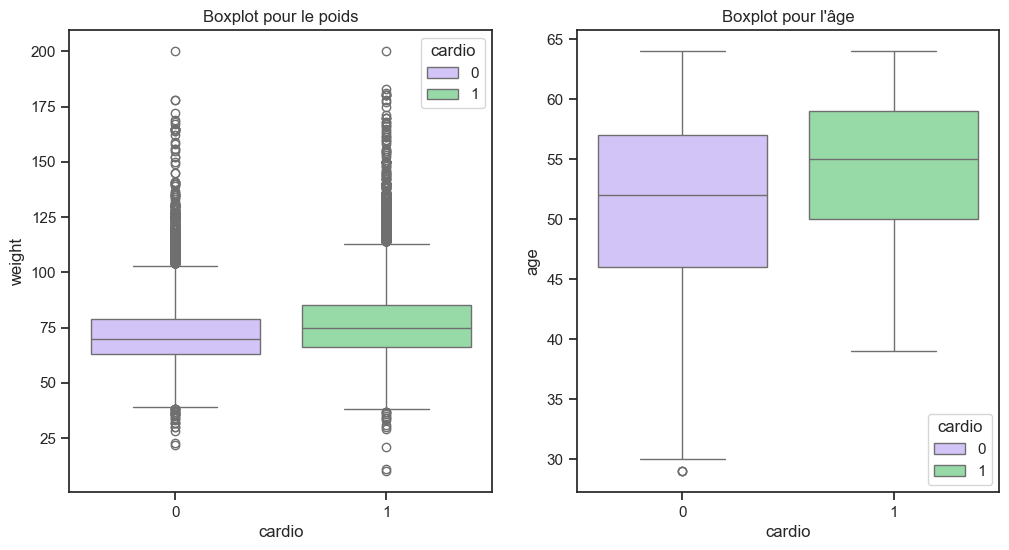

In [6]:
sns.set_theme(style="ticks", palette="pastel")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.boxplot(x="cardio", y="weight",
            hue="cardio", palette=["m", "g"],
            data=data, ax=axes[0])

sns.boxplot(x="cardio", y="age",
            hue="cardio", palette=["m", "g"],
            data=data, ax=axes[1])

axes[0].set_title('Boxplot pour le poids')
axes[1].set_title('Boxplot pour l\'âge')

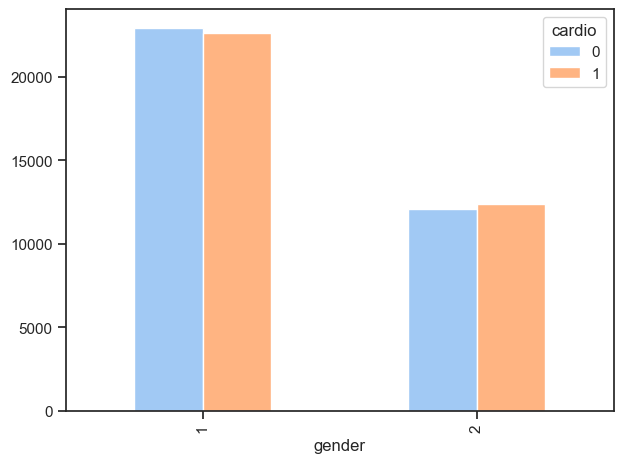

In [15]:
gender_crosstab = pd.crosstab(index=data['gender'], columns=data['cardio'], margins=True)
gender_crosstab.drop(['All'], axis=1, inplace=True)
gender_crosstab.drop(['All'], axis=0, inplace=True)

#fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 10))
gender_crosstab.plot(kind='bar')
plt.tight_layout()
plt.show()

### Conclusion
Dans ce jeu de données : 
- Les __femmes__ qui souffrent d'une maladie cardio-vasculaire sont __*moins*__ des femmes qui sont saines
- Les __hommes__ qui souffrent d'une maladie cardio-vasculaire sont __*plus*__ des femmes qui sont sains

<Axes: xlabel='age'>

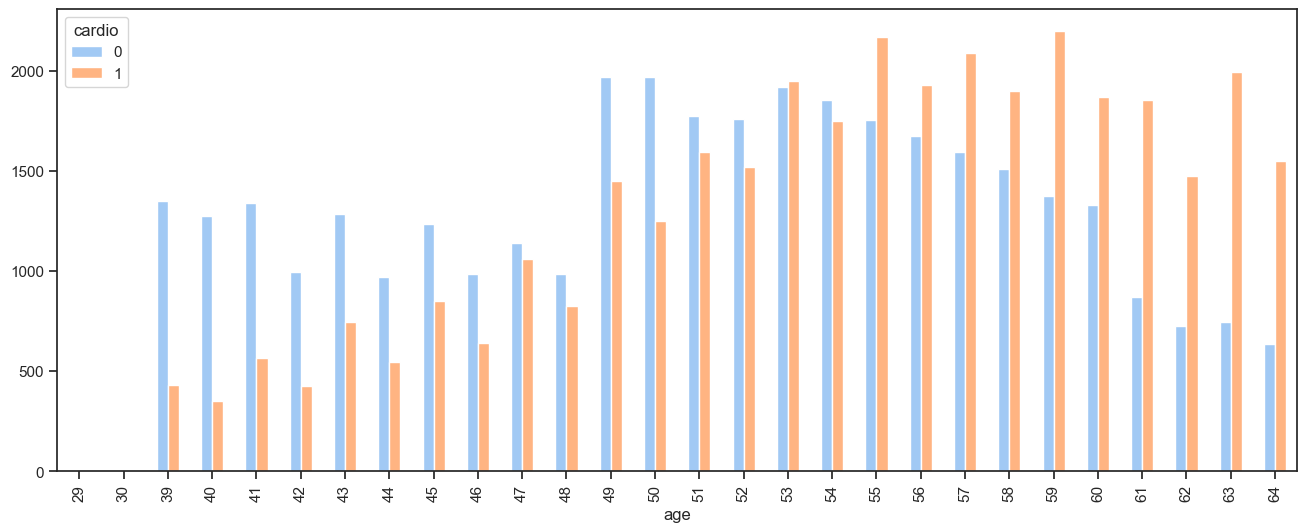

In [13]:
age_crosstab = pd.crosstab(index=data['age'], columns=data['cardio'], margins=True)
age_crosstab.drop(['All'], axis=1, inplace=True)
age_crosstab.drop(['All'], axis=0, inplace=True)

fig, axes = plt.subplots(figsize=(16, 6))
age_crosstab.plot(kind='bar', ax=axes)

On remarque qu'à partir de 55 ans, le nombre des gens atteints par une maladie cardio-vasculaire depasse le nobre des gens sains

<Figure size 1000x600 with 0 Axes>

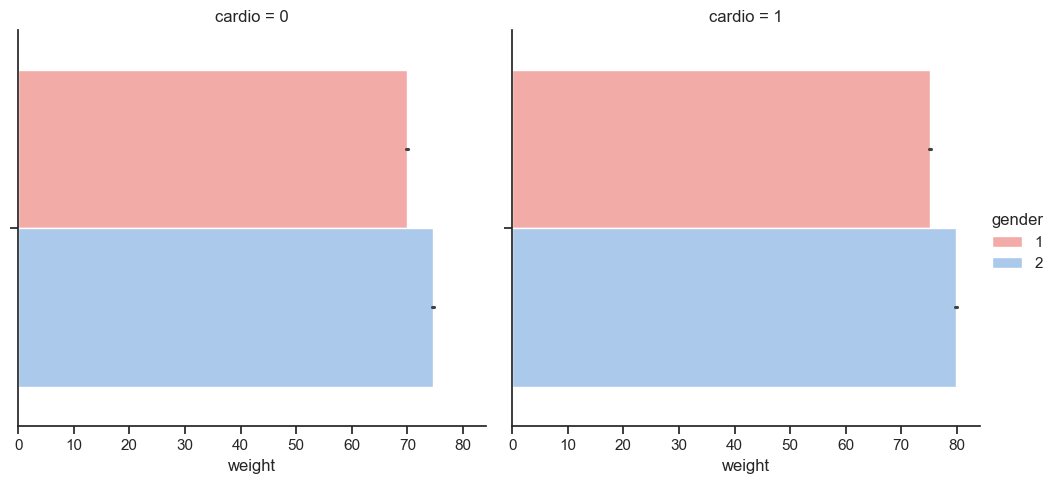

In [8]:
plt.figure(figsize=(10, 6))

sns.catplot(x="weight", hue="gender", col="cardio", data=data, kind='bar', palette=["r", "b"])

plt.show()


On observe que, en moyenne, les patients avec une maladie cardio-vasculaire sont plus lourds que les patients sans maladie cardio-vasculaire.

BMI = \frac {mass_{kg}} {height ^2_{m}},

In [9]:
data['BMI'] = data['weight']/((data['height']/100)**2)

<Figure size 1000x600 with 0 Axes>

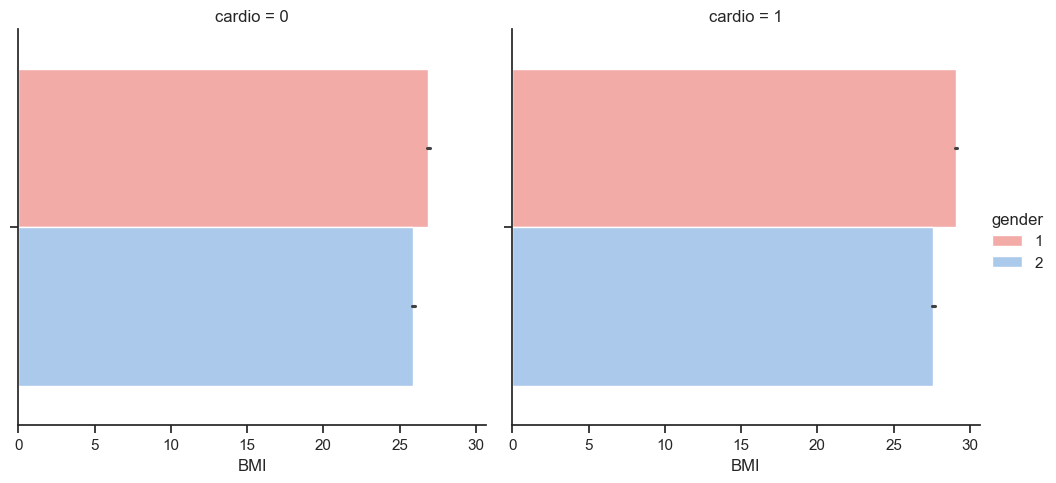

In [10]:
plt.figure(figsize=(10, 6))

sns.catplot(x="BMI", hue="gender", col="cardio", data=data, kind='bar', palette=["r", "b"])

plt.show()

# Analysing examination features

C:\Users\PC de MEDUSA\AppData\Local\Temp\ipykernel_49168\965545443.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(


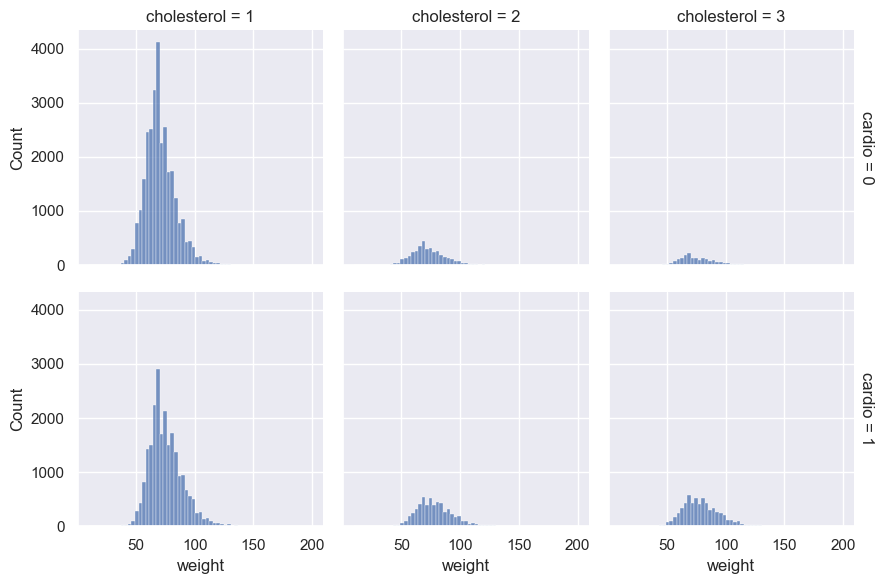

In [44]:
sns.displot(
    data, x="weight", col="cholesterol", row="cardio",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
    palette=["b", "g"]
)